In [1]:
from pprint import pformat

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv("aggregated_results/main_results_2023-02-16.csv")
# df

In [3]:
# Take the mean score for each task across all runs
reduced_df = (
    df
    .groupby(["task_name", "network", "label", "method"], as_index=False)
    .mean()
    .drop(columns=["runid"])
)
# reduced_df

In [4]:
label_order = df.groupby("label")["test_log2pr"].median().sort_values(ascending=False).index.tolist()
print(f"Gene set collections sorted by mean performance across all methods:\n{pformat(label_order)}")

Gene set collections sorted by mean performance across all methods:
['diseases_textminingfiltered',
 'diseases',
 'diseases_knowledgefiltered',
 'disgenet_curated',
 'disgenet',
 'disgenet_befree',
 'hpo',
 'disgenet_animal',
 'diseases_experimentsfiltered',
 'disgenet_gwas']


In [5]:
method_order = df.groupby("method")["test_log2pr"].median().sort_values(ascending=False).index.tolist()
print(f"Methods sorted by mean performance across all gene set collections:\n{pformat(method_order)}")

Methods sorted by mean performance across all gene set collections:
['adj-logreg',
 'labelprop',
 'adj-svm',
 'graphsage',
 'gcn',
 'n2v-logreg',
 'n2v-svm',
 'gin',
 'gat']


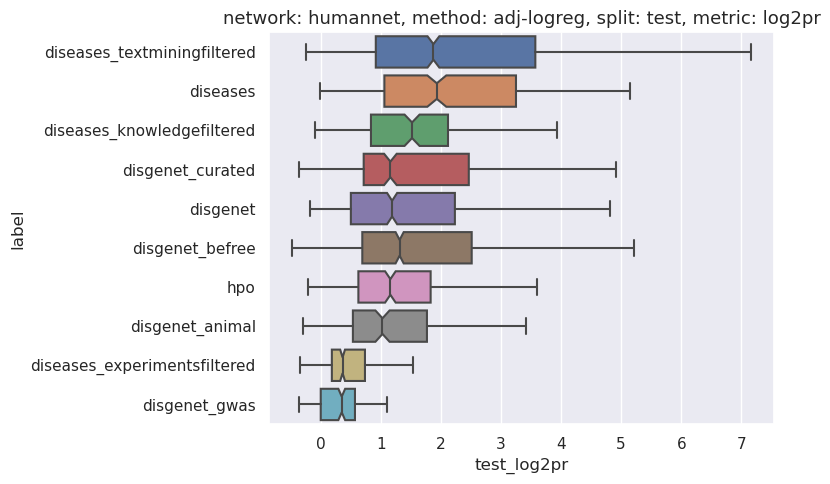

In [6]:
# -------------------
selected_network = "humannet"
selected_method = "adj-logreg"
selected_split = "test"
selected_metric = "log2pr"
# -------------------

plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df.query("network == @selected_network & method == @selected_method"),
    x=f"{selected_split}_{selected_metric}",
    y="label",
    showfliers=False,
    notch=True,
    order=label_order,
)

plt.title(
    f"network: {selected_network}, "
    f"method: {selected_method}, "
    f"split: {selected_split}, "
    f"metric: {selected_metric}",
    fontsize=13,
)

plt.tight_layout()
plt.show()

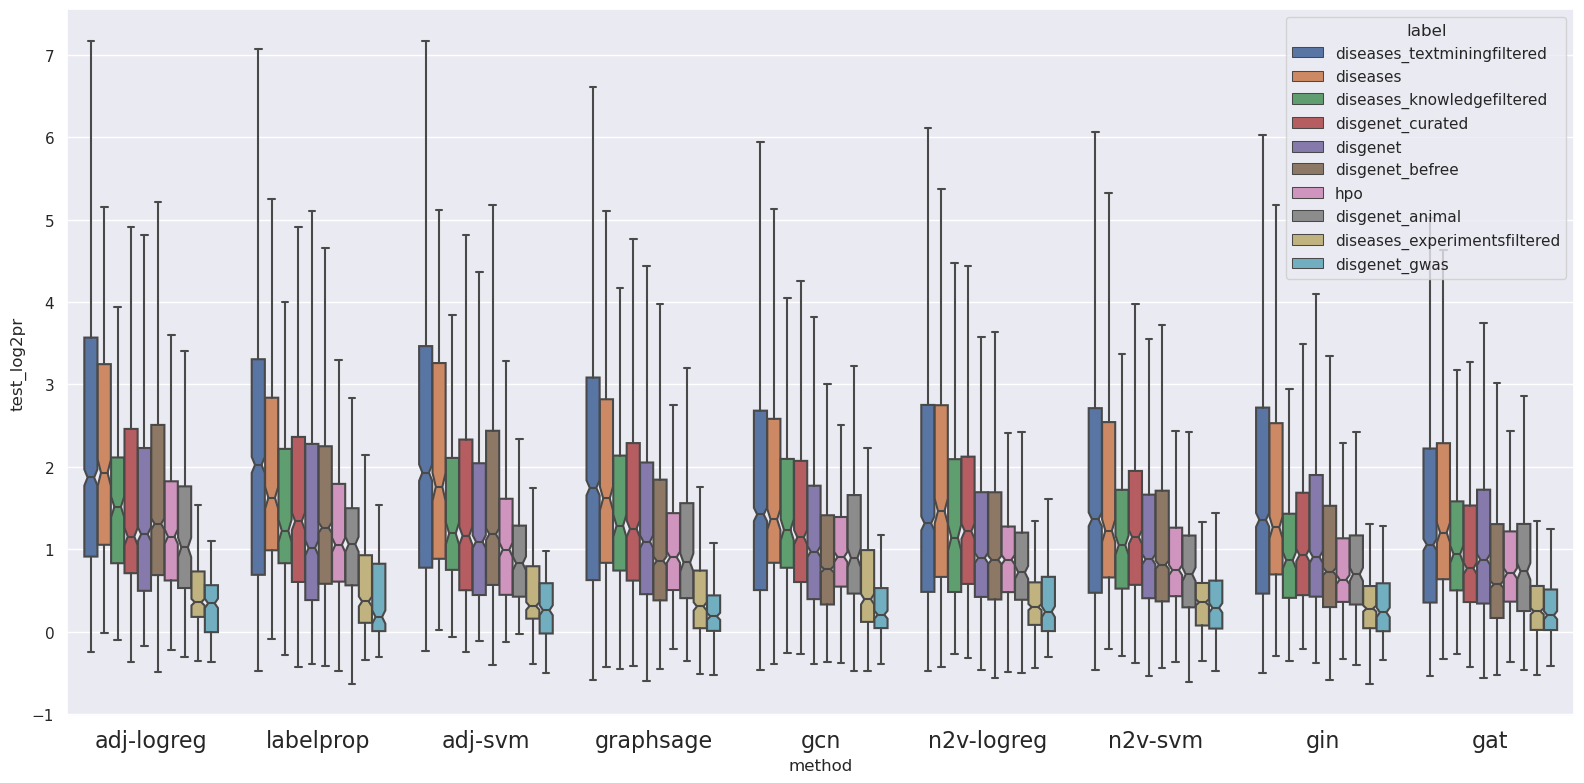

In [7]:
plt.figure(figsize=(16, 8))

sns.boxplot(
    data=df.query("network == 'humannet'"),
    hue="label",
    y="test_log2pr",
    x="method",
    showfliers=False,
    notch=True,
    hue_order=label_order,
    order=method_order,
)

plt.xticks(fontsize=16)

plt.tight_layout()
plt.show()

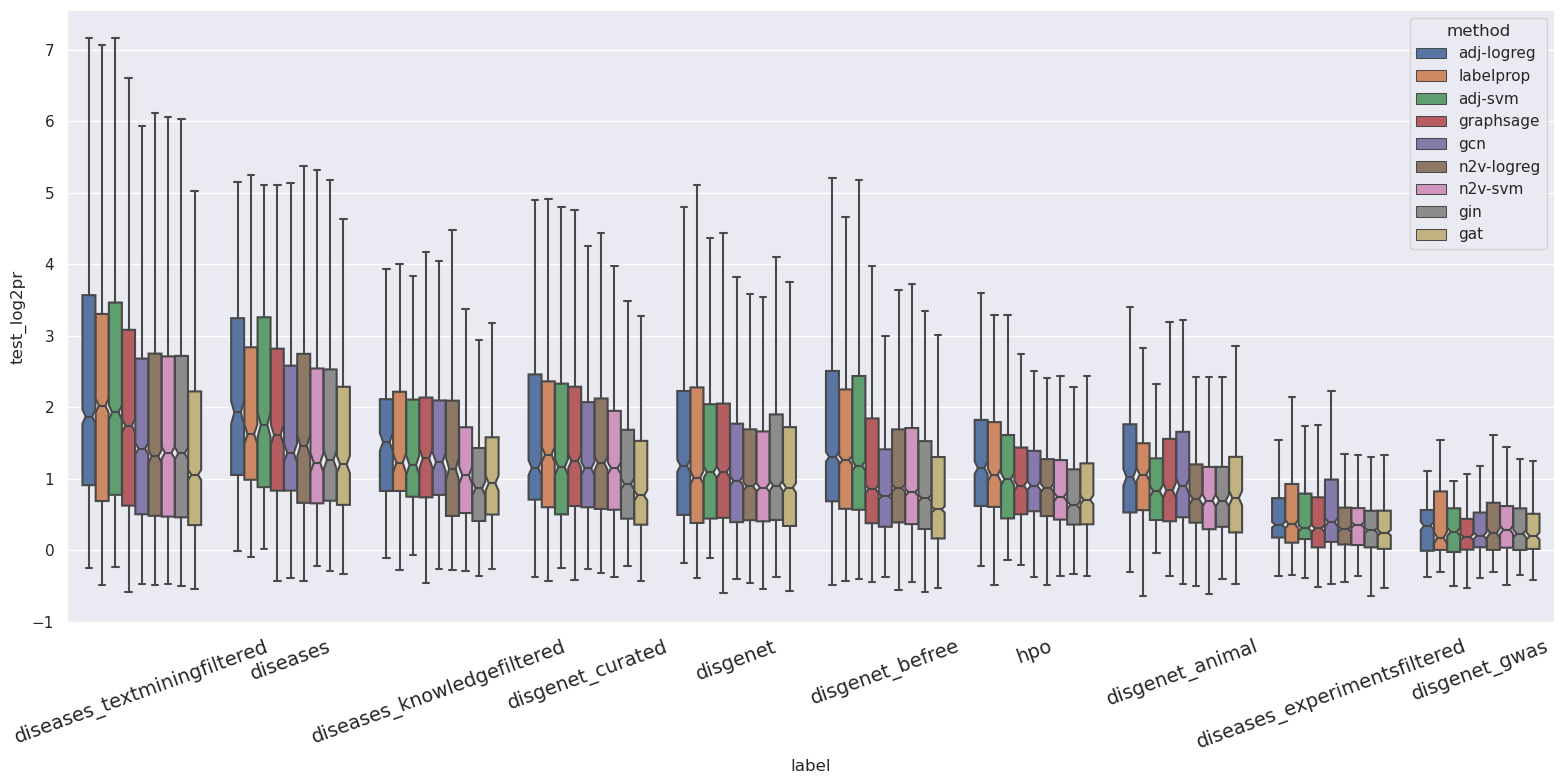

In [8]:
plt.figure(figsize=(16, 8))

sns.boxplot(
    data=df.query("network == 'humannet'"),
    x="label",
    y="test_log2pr",
    hue="method",
    showfliers=False,
    notch=True,
    hue_order=method_order,
    order=label_order,
)
plt.xticks(fontsize=14, rotation=20)

plt.tight_layout()
plt.show()

In [9]:
# Take the average score across all tasks within a run
summary_df = df.groupby(["network", "label", "method", "runid"], as_index=False).mean(numeric_only=True)
summary_df

,network,label,method,runid,train_log2pr,val_log2pr,test_log2pr,train_auroc,val_auroc,test_auroc
0,humannet,diseases,adj-logreg,0.0,4.752281,2.470688,2.148892,1.000000,0.708776,0.669319
1,humannet,diseases,adj-logreg,1.0,4.752281,2.470688,2.148892,1.000000,0.708776,0.669319
2,humannet,diseases,adj-logreg,2.0,4.752281,2.470688,2.148892,1.000000,0.708776,0.669319
3,humannet,diseases,adj-logreg,3.0,4.752281,2.470688,2.148892,1.000000,0.708776,0.669319
4,humannet,diseases,adj-logreg,4.0,4.752281,2.470688,2.148892,1.000000,0.708776,0.669319
...,...,...,...,...,...,...,...,...,...,...
445,humannet,hpo,n2v-svm,0.0,2.781610,1.058070,0.944477,0.852157,0.611532,0.598107
446,humannet,hpo,n2v-svm,1.0,2.801681,1.061805,0.891099,0.852754,0.618118,0.582716
447,humannet,hpo,n2v-svm,2.0,2.788817,1.053075,0.986579,0.850379,0.618501,0.602486
448,humannet,hpo,n2v-svm,3.0,2.787287,1.081995,0.920967,0.852656,0.611687,0.596427


In [10]:
def mean_std_str(x, *, k=3):
    mean = np.mean(x)
    std = np.std(x)
    return f"{mean:.{k}f} ± {std:.{k}f}"

selected_methods = [
    "adj-logreg",
    "adj-svm",
    "n2v-logreg",
    "n2v-svm",
    "gat",
    "gcn",
    "gin",
    "graphsage",
    "labelprop",
]

In [11]:
(
    summary_df
    .pivot_table("test_log2pr", "label", "method", aggfunc=mean_std_str)[selected_methods]
    .style
    .highlight_max(color="lightgreen", axis=1)
    .highlight_max(color="lightblue", axis=0)
)

method,adj-logreg,adj-svm,n2v-logreg,n2v-svm,gat,gcn,gin,graphsage,labelprop
label,,,,,,,,,
diseases,2.149 ± 0.000,2.053 ± 0.000,1.782 ± 0.021,1.637 ± 0.069,1.535 ± 0.066,1.767 ± 0.064,1.630 ± 0.044,1.865 ± 0.026,2.000 ± 0.000
diseases_experimentsfiltered,0.608 ± 0.000,0.550 ± 0.000,0.413 ± 0.036,0.420 ± 0.031,0.409 ± 0.022,0.649 ± 0.061,0.419 ± 0.042,0.478 ± 0.045,0.592 ± 0.000
diseases_knowledgefiltered,1.737 ± 0.000,1.627 ± 0.000,1.452 ± 0.065,1.322 ± 0.044,1.275 ± 0.063,1.597 ± 0.063,1.143 ± 0.128,1.551 ± 0.042,1.581 ± 0.000
diseases_textminingfiltered,2.262 ± 0.000,2.231 ± 0.000,1.751 ± 0.016,1.751 ± 0.011,1.444 ± 0.069,1.755 ± 0.033,1.759 ± 0.046,1.996 ± 0.038,2.156 ± 0.000
disgenet,1.562 ± 0.000,1.479 ± 0.000,1.243 ± 0.022,1.229 ± 0.048,1.184 ± 0.043,1.286 ± 0.034,1.326 ± 0.050,1.420 ± 0.023,1.441 ± 0.000
disgenet_animal,1.141 ± 0.000,1.038 ± 0.000,0.917 ± 0.032,0.815 ± 0.017,0.911 ± 0.053,1.071 ± 0.061,0.843 ± 0.021,1.033 ± 0.042,1.100 ± 0.000
disgenet_befree,1.681 ± 0.000,1.559 ± 0.000,1.175 ± 0.052,1.152 ± 0.021,0.885 ± 0.088,1.025 ± 0.053,1.057 ± 0.098,1.238 ± 0.069,1.542 ± 0.000
disgenet_curated,1.682 ± 0.000,1.615 ± 0.000,1.517 ± 0.046,1.422 ± 0.026,1.091 ± 0.049,1.534 ± 0.058,1.235 ± 0.065,1.573 ± 0.051,1.582 ± 0.000
disgenet_gwas,0.556 ± 0.000,0.491 ± 0.000,0.380 ± 0.025,0.379 ± 0.029,0.363 ± 0.024,0.436 ± 0.032,0.461 ± 0.071,0.442 ± 0.026,0.487 ± 0.000


In [12]:
(
    summary_df
    .pivot_table("test_log2pr", "label", "method", aggfunc="mean")[selected_methods]
    .style
    .background_gradient(cmap="viridis", axis=1)
)

method,adj-logreg,adj-svm,n2v-logreg,n2v-svm,gat,gcn,gin,graphsage,labelprop
label,,,,,,,,,
diseases,2.148892,2.052846,1.781533,1.637239,1.535317,1.766804,1.630367,1.864945,2.000371
diseases_experimentsfiltered,0.607535,0.550002,0.412603,0.420003,0.408897,0.648558,0.418930,0.478154,0.592420
diseases_knowledgefiltered,1.736521,1.627125,1.452297,1.321943,1.274713,1.596721,1.143359,1.550980,1.581053
diseases_textminingfiltered,2.261506,2.231498,1.751411,1.751305,1.444382,1.754844,1.759175,1.995852,2.156249
disgenet,1.561691,1.478798,1.243038,1.229166,1.183720,1.285928,1.326207,1.419996,1.440647
disgenet_animal,1.141314,1.037989,0.916612,0.814750,0.910776,1.071028,0.843157,1.033257,1.099949
disgenet_befree,1.681334,1.558626,1.175086,1.151716,0.884782,1.024702,1.056520,1.238039,1.541587
disgenet_curated,1.682385,1.614927,1.516737,1.421555,1.091096,1.533926,1.234930,1.573371,1.582242
disgenet_gwas,0.556153,0.490572,0.379747,0.379197,0.363260,0.435591,0.461447,0.442420,0.486612


Notes
- In contrast to the main results shown in the ``nlevel`` v1 manuscript, ``GAT`` performs poorly, which might because it is hard to tune and thus rquires some efforts to tune it to the optimal performance.

In [13]:
(
    summary_df
    .pivot_table("test_log2pr", "label", "method", aggfunc="mean")[selected_methods]
    .style
    .background_gradient(cmap="viridis", axis=0)
)

method,adj-logreg,adj-svm,n2v-logreg,n2v-svm,gat,gcn,gin,graphsage,labelprop
label,,,,,,,,,
diseases,2.148892,2.052846,1.781533,1.637239,1.535317,1.766804,1.630367,1.864945,2.000371
diseases_experimentsfiltered,0.607535,0.550002,0.412603,0.420003,0.408897,0.648558,0.418930,0.478154,0.592420
diseases_knowledgefiltered,1.736521,1.627125,1.452297,1.321943,1.274713,1.596721,1.143359,1.550980,1.581053
diseases_textminingfiltered,2.261506,2.231498,1.751411,1.751305,1.444382,1.754844,1.759175,1.995852,2.156249
disgenet,1.561691,1.478798,1.243038,1.229166,1.183720,1.285928,1.326207,1.419996,1.440647
disgenet_animal,1.141314,1.037989,0.916612,0.814750,0.910776,1.071028,0.843157,1.033257,1.099949
disgenet_befree,1.681334,1.558626,1.175086,1.151716,0.884782,1.024702,1.056520,1.238039,1.541587
disgenet_curated,1.682385,1.614927,1.516737,1.421555,1.091096,1.533926,1.234930,1.573371,1.582242
disgenet_gwas,0.556153,0.490572,0.379747,0.379197,0.363260,0.435591,0.461447,0.442420,0.486612


In [13]:
(
    summary_df
    .pivot_table("test_log2pr", "label", "method", aggfunc="mean")[selected_methods]
    .style
    .background_gradient(cmap="viridis", axis=0)
)

method,adj-logreg,adj-svm,n2v-logreg,n2v-svm,gat,gcn,gin,graphsage,labelprop
label,,,,,,,,,
diseases,2.148892,2.052846,1.781533,1.637239,1.535317,1.766804,1.630367,1.864945,2.000371
diseases_experimentsfiltered,0.607535,0.550002,0.412603,0.420003,0.408897,0.648558,0.418930,0.478154,0.592420
diseases_knowledgefiltered,1.736521,1.627125,1.452297,1.321943,1.274713,1.596721,1.143359,1.550980,1.581053
diseases_textminingfiltered,2.261506,2.231498,1.751411,1.751305,1.444382,1.754844,1.759175,1.995852,2.156249
disgenet,1.561691,1.478798,1.243038,1.229166,1.183720,1.285928,1.326207,1.419996,1.440647
disgenet_animal,1.141314,1.037989,0.916612,0.814750,0.910776,1.071028,0.843157,1.033257,1.099949
disgenet_befree,1.681334,1.558626,1.175086,1.151716,0.884782,1.024702,1.056520,1.238039,1.541587
disgenet_curated,1.682385,1.614927,1.516737,1.421555,1.091096,1.533926,1.234930,1.573371,1.582242
disgenet_gwas,0.556153,0.490572,0.379747,0.379197,0.363260,0.435591,0.461447,0.442420,0.486612


**Summary**: Difficulties for the network based machine learning methods to capture different annotation sources can be roughly ordered as follow:
    *experiments* > *inferred* > *curated* > *text-mined*

Notes
- The ranking of 'difficulties' of the different gene set collections are consistent across all methods
- Both `DisGeNET` and `DISEASES` show similar trends, where
    - Text-mined annotations (`diseases_textminingfiltered` and `disgenet_befree`) can be best captured by all methods
    - Curated annotations (`diseases_knowledgefiltered` and `disgenet_curated`) are less well captured than text-mined annotations.
    - Inffered annotations (`disgenet_animal`, `hpo`) are even harder to be captured.
    - Annotations by high-throughput experiments (`diseases_experimentsfiltered`, `disgenet_gwas`) are the hardest to capture by any network based machine learing methods.

In [14]:
# # Export to latex
# print(
#     summary_df
#     .pivot_table("test_log2pr", "label", "method", aggfunc=mean_std_str)[selected_methods]
#     .style
#     .to_latex()
# )